# Preprocessing and Visualization

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('titnic_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

## Пропуски в данных (np.nan )
- удаление строк (если мало пропусков)
- удаление столбца (если мало пропусков или столбец не важен)
- сделать колонку с информацией и заполнении (1 и 0)
- заполнить средним значением, медианой или модой 
- сделать модель на основе других данных таблици и заполнить пропуски 

In [4]:
df.isna().sum() # df.isnull().sum() тоже самое только функции из разных библиотек 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.dropna().shape # удаление строк .dropna()

(183, 12)

In [6]:
# заполнение на 0, также на  медиану, среднее или любое другое значение
df['new_age'] = df['Age'].fillna(0) 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
new_age          0
dtype: int64

In [7]:
# заполнение на 0 и 1
def find_age(x):
    if np.isnan(x):
        return 0
    else:
        return 1
df['Age'].apply(lambda x: find_age(x))

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Age, Length: 891, dtype: int64

## Валидация данных:
- проверка на слишком большие или малые значения (выбросы и аномалии)
- проверка на правильность ввода типа данных 
...

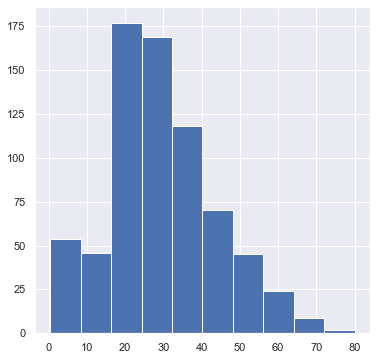

In [8]:
df['Age'].hist(figsize=(6, 6))
plt.show()

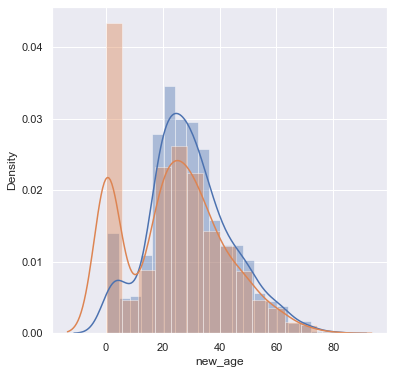

In [9]:
plt.figure(figsize=(6, 6))
sns.distplot(df['Age'])
sns.distplot(df['new_age'])
plt.show()

<AxesSubplot:ylabel='Age'>

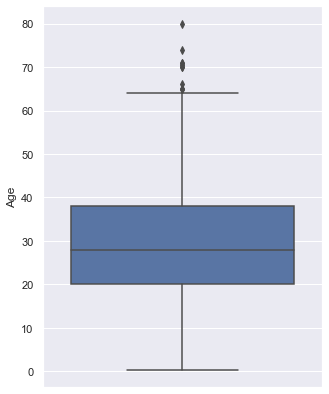

In [10]:
plt.figure(figsize=(5, 7))
sns.boxplot(y=df['Age'])

## Коллениарность и мультиколлениарность фич
- удаление лишних данных, нужно оставить более полезные 

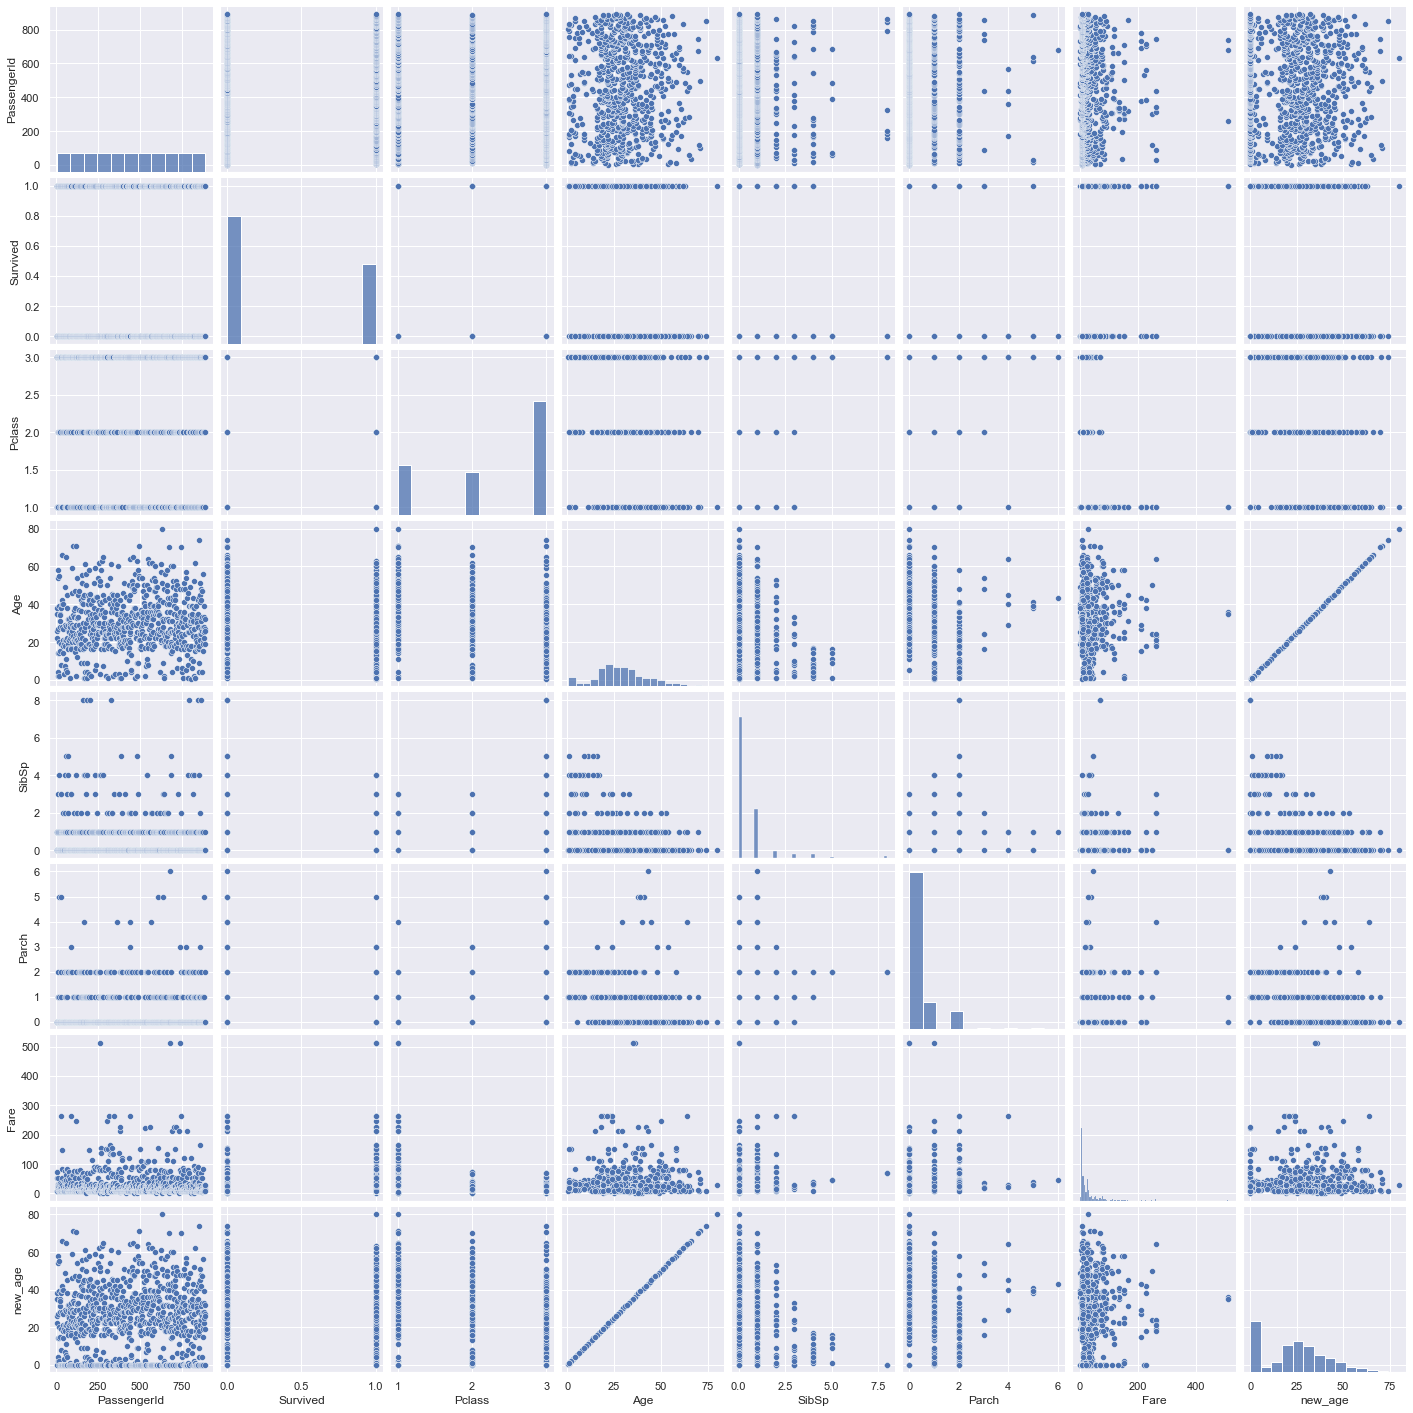

In [11]:
# просмотр на коллениарность по всем данным 
sns.pairplot(df)
plt.show()

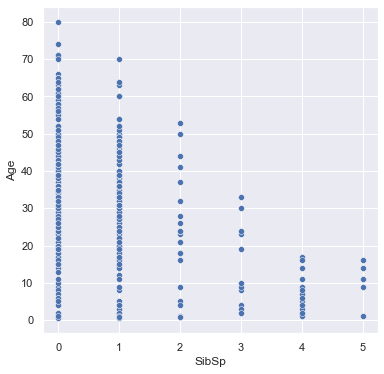

In [12]:
# просмотр на коллениарность отдельно
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df.SibSp, y=df.Age)
plt.show()

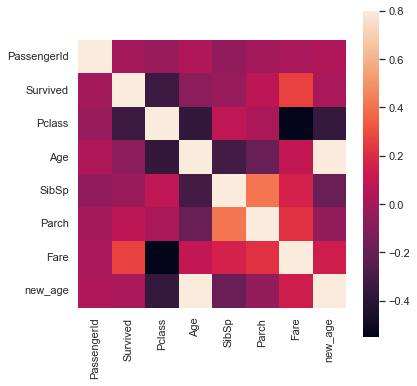

In [13]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

## Разные диапазоны данных:
Если диапозоны слишком разные, то одна фича может гораздо сильнее влеять на результат чем другая, данная проблема актуальна в градиентном спуске и в некоторых моделях машинного обучения(например KNN)
- Применяем нормализацию - распраделение данных центрируется вокруг нуля

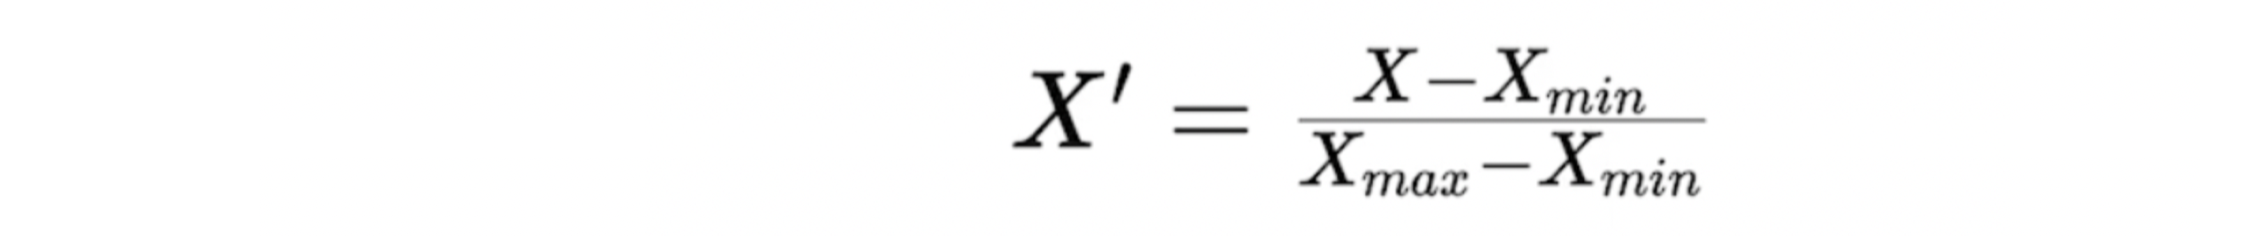

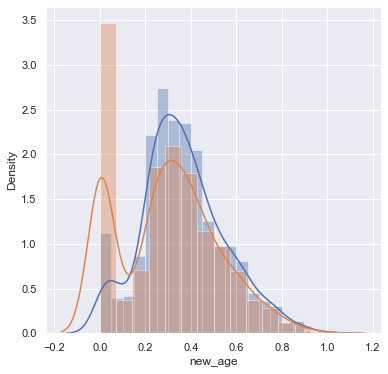

In [14]:
def norm(x):
    return (x-x.min())/(x.max()-x.min())

plt.figure(figsize=(6, 6))
sns.distplot(norm(df['Age']))
sns.distplot(norm(df['new_age']))
plt.show()

- Применяем стандартизацию - распределение центрируется вокруг нуля и стандартное отклонение равно единице

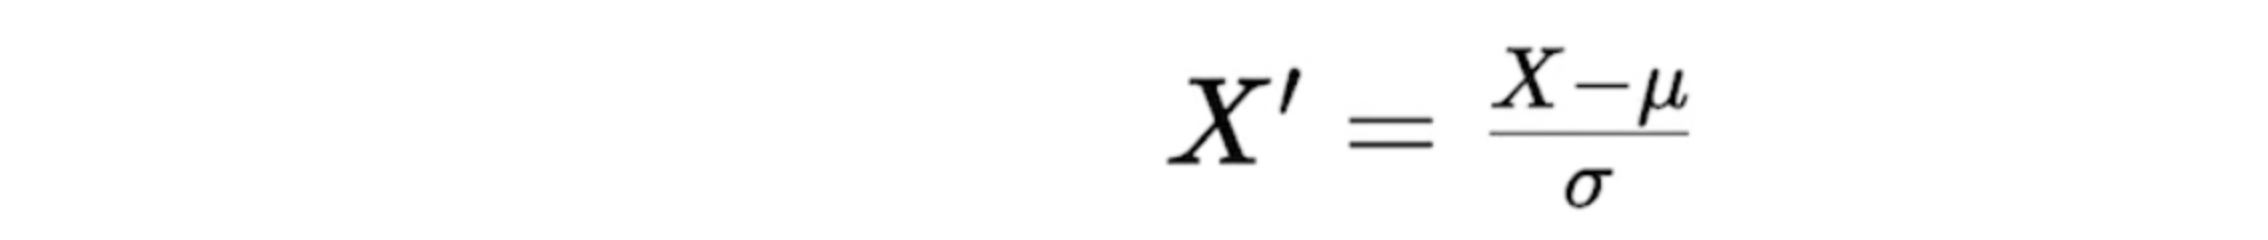

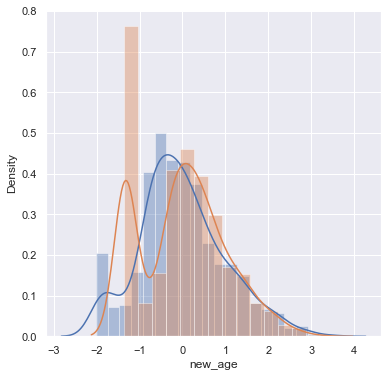

In [15]:
def stand(x):
    return (x-x.mean())/x.std()
plt.figure(figsize=(6, 6))
sns.distplot(stand(df['Age']))
sns.distplot(stand(df['new_age']))
plt.show()

- Также в некоторых случаях может пригодится логорифмирование данных 

## Проблема наменативных данных 
Т.к. номенативные данные нельзя привязывать к числам, чтобы алгоритм машинного обучения не нашел закономерности там где их нет. Используют one-hot encoding - превращение номенативных данных в вектора(стоит использовать если классов не так много)
Перед преминением стоит просмотреть уникальные значения в этой колонке

In [16]:
data = df[['Embarked']].head(7)
data

,Embarked
0,S
1,C
2,S
3,S
4,S
5,Q
6,S


In [17]:
pd.get_dummies(data, prefix='new')

,new_C,new_Q,new_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1


## Высокоуровневая работа с данными: 
- Агрегация - получение информации из других источников, если это возможно 
- Деагрегация - удалиние или объединение колонок 

---------

## Количественные признаки

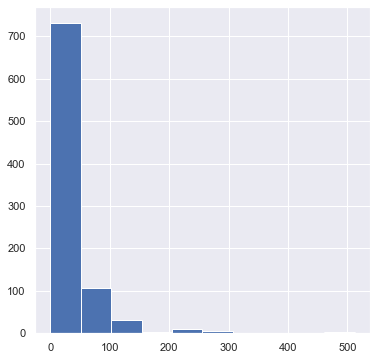

In [21]:
df['Fare'].hist(figsize=(6, 6));

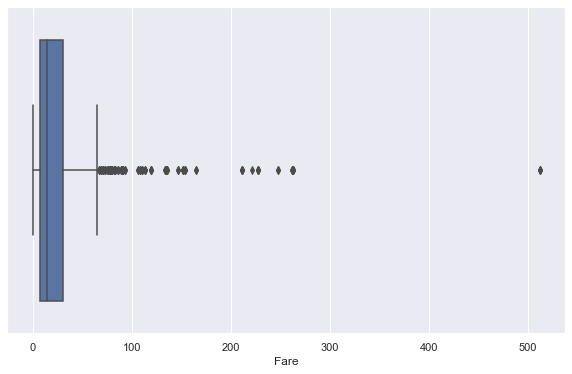

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Fare']);

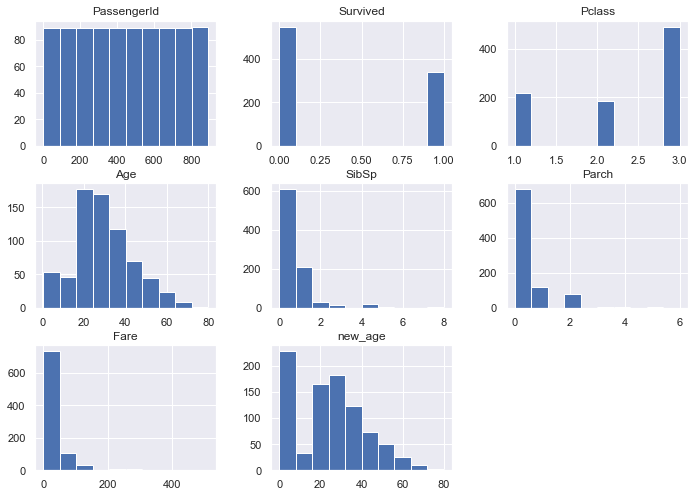

In [39]:
df.hist();

## Категориальные признаки

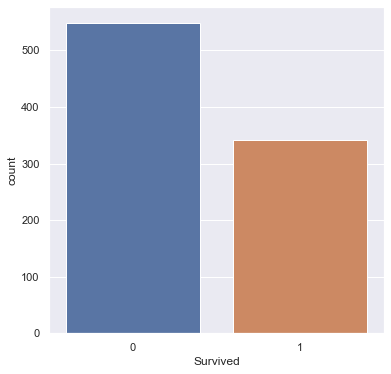

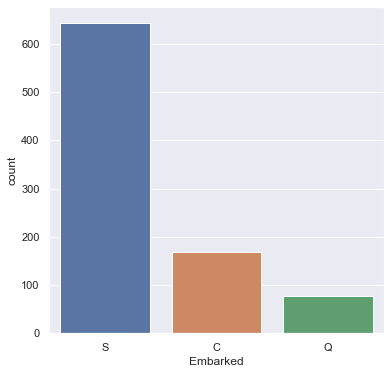

In [43]:
plt.figure(figsize=(6, 6))
sns.countplot(df.Survived);
plt.show()
plt.figure(figsize=(6, 6))
sns.countplot(df.Embarked);

## Взаимодействия колич признаков

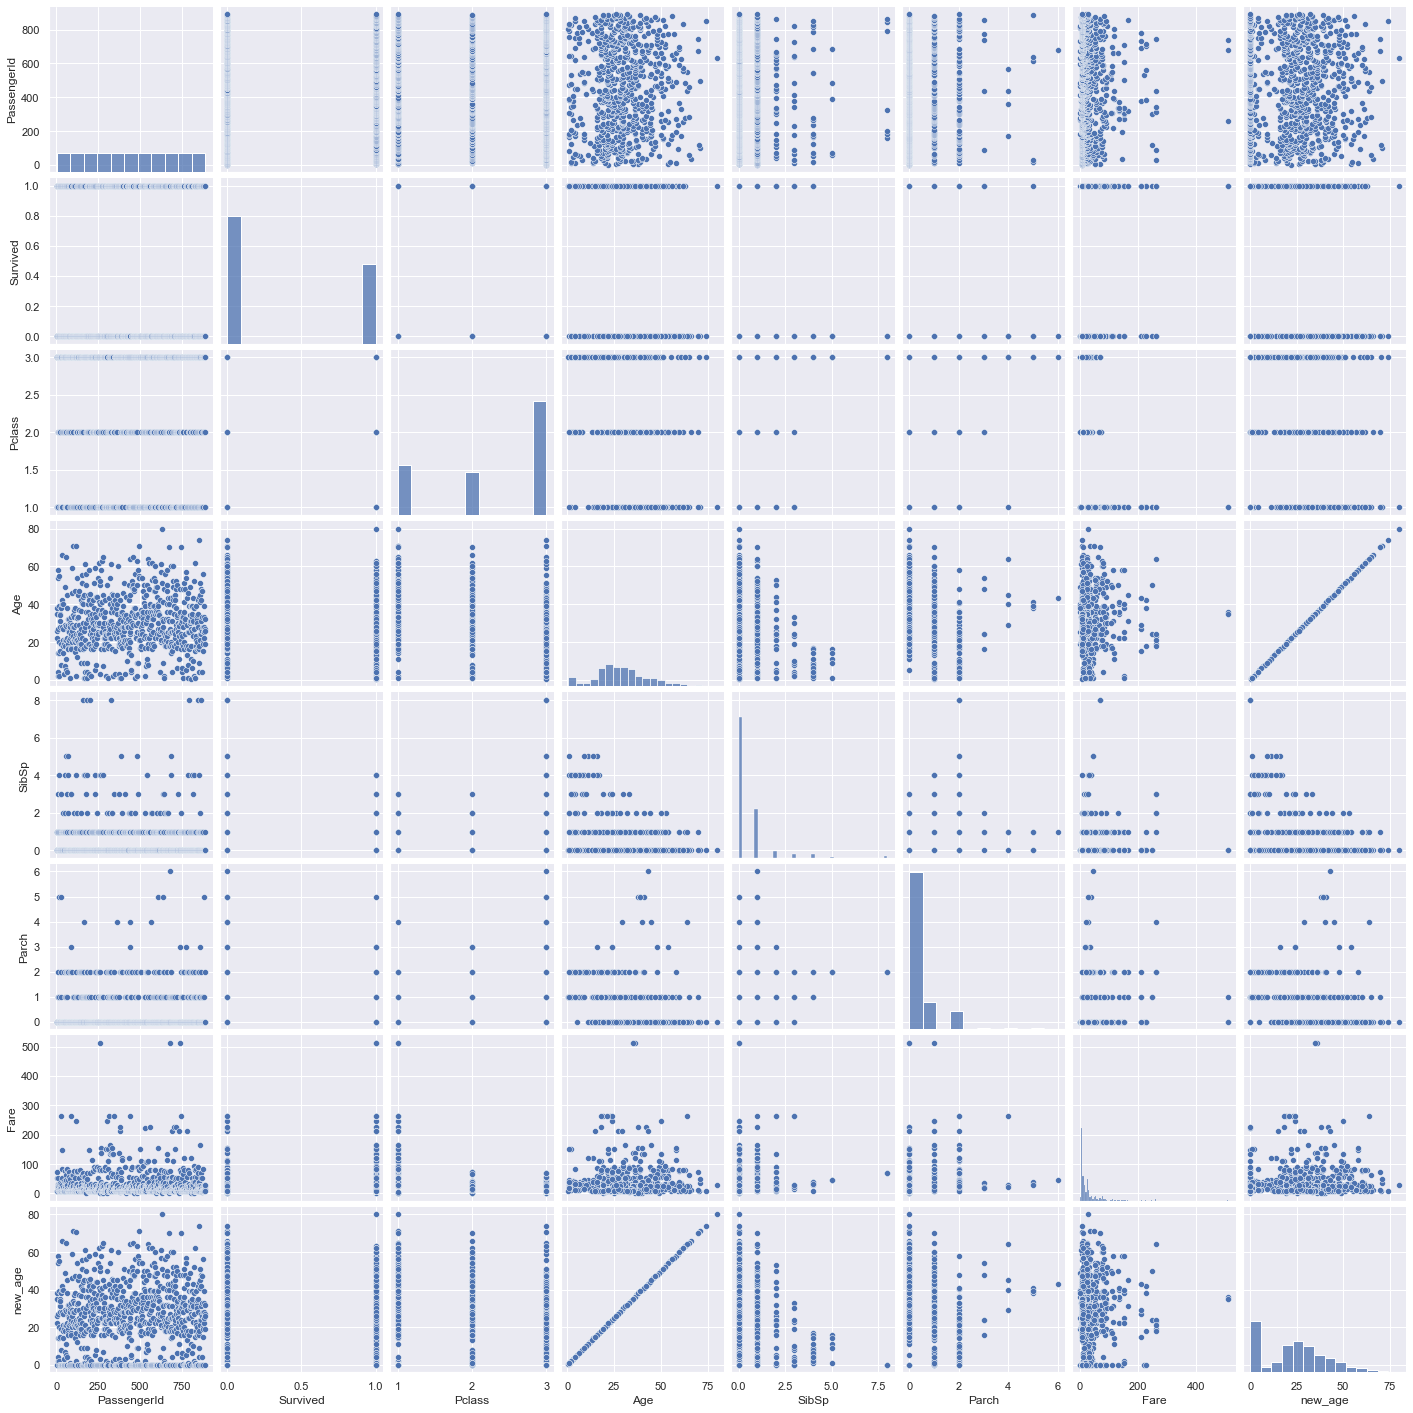

In [45]:
sns.pairplot(df);

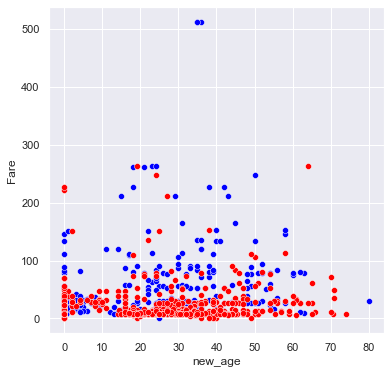

In [72]:
# раскраска по призанаку 
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.new_age[df.Survived == 1], y=df.Fare, color='blue')
sns.scatterplot(x=df.new_age[df.Survived == 0], y=df.Fare, color='red')
plt.show()

## Корреляция

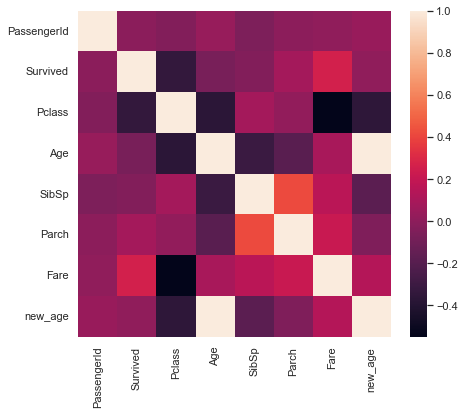

In [130]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr());

## Взаимодействия колич признаков и категориальных

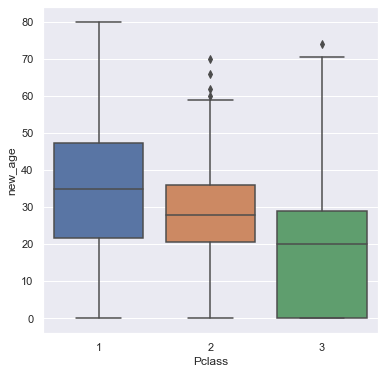

In [90]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Pclass', y='new_age', data=df);

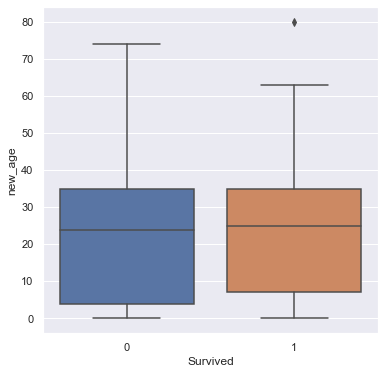

In [91]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Survived', y='new_age', data=df);

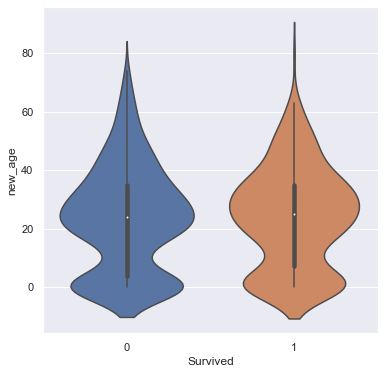

In [92]:
plt.figure(figsize=(6,6))
sns.violinplot(x='Survived', y='new_age', data=df);

## Категор. - Категор. 

In [95]:
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

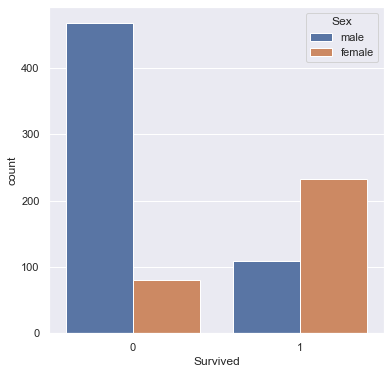

In [97]:
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', hue='Sex', data=df)

## t-SNE

In [98]:
from sklearn.manifold import TSNE

In [99]:
tsne = TSNE(random_state=10)

In [117]:
df1 = df.drop(['Name', 'Ticket', 'Cabin', 'new_age'], axis=1)
df1.Sex = df1.Sex.map({'male':1, 'female':0})
df1 = pd.get_dummies(df1)
df1.Age = df['Age'].fillna(df1.Age.mean()) 
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [119]:
tsne.fit(df1)

TSNE(random_state=10)

In [126]:
print(df1.shape)
print(tsne.embedding_.shape)

(891, 11)
(891, 2)


### Отображение 11 мерного пространства на плоскость

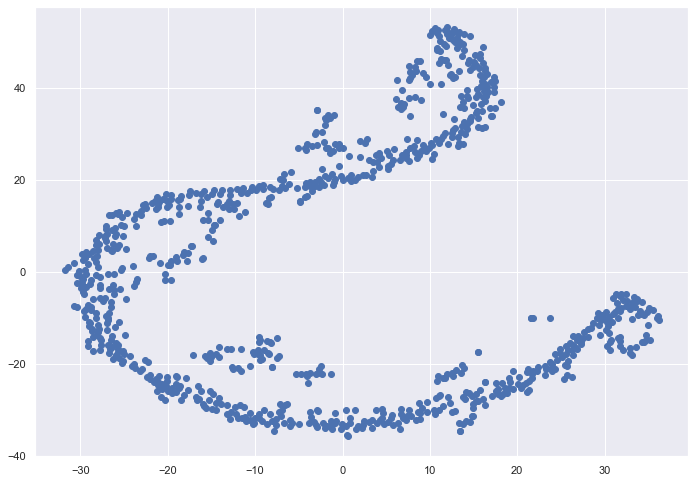

In [124]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1]);